# 로지스틱 회귀 모델 필요성

---

- 범주형 반응변수
  - 이진변수(반응변수 값이 0 or 1)
  - 멀티변수(반응변수 값이 1 or 2 or 3 이상)
- 선형회귀모델과는 다른 방식으로 접근해야 될 필요성

---
VS SVM
- 로지스틱 회귀는 훈련 데이터의 조건부 가능도를 최대화하기 떄문에 SVM보다 이상치에 민감함.
- 로지스틱 회귀는 모델이 간단하고 구현하기가 더 쉬운 장점
- 로지스틱 회귀 모델은 업데이트가 용이하므로 스트리밍 데이터를 다룰 때 적합하다.

로지스틱 회귀모델 사용
- 새로운 관측치가 왔을 때 이를 기존 범주 중 하나로 예측(범주예측)

# 로지스틱 회귀모델 이론 배경
Consider Yi to ve a Benoulli random variable

![대체 텍스트](https://image3.slideserve.com/6114396/bernoulli-distribution-l.jpg)

X값이 주어졌을 때 출력변수 Y가 1의 값을 가질 확률

# 로지스틱 회귀분석 알고리즘 - 로지스틱 함수

![대체 텍스트](https://t1.daumcdn.net/cfile/tistory/99F325485C7B76BC2B)

- 아웃풋 범위: 0~1
- 인풋값에 대해 단조증가 (혹은 단조감소) 함수
- 미분결과를 아웃풋의 함수로 표현 가능(Gradient learning method에 유용하게 사용)

---

- 단순로지스틱 회귀모델: 입력변수 X가 1개인 로지스틱 회귀모델

# 로지스틱 회귀모델 - B(베타)의 해석

![대체 텍스트](https://wikidocs.net/images/page/32046/ANN_Sigmoid.png)

- B의 해석 -> 직관적이지 못함

- 승산(Odds) : 범주가 1일확률/ 범주가 0일 확률
 - 성공 확률을 p로 정의할 때, 실패 대비 성공 확률 비율

 ![대체 텍스트](https://www.cdc.gov/nchs/tutorials/nhanes/NHANESAnalyses/images/logistic_OddsRatio_formula.gif)

  - p: 1 -> odd = 무한대
  - p: 0 -> odd = 0

---

![대체 텍스트](https://static.oddschecker.com/content/types/TIP/football-worldcupfifarankings2.jpg?v=7145853)

- 독일의 우승 odds(p/(1-p))는 1/5, 독일의 우승 확률은 1/6
- 대한민국의 우승 odds는 1/750, 즉 대한민국의 우승 확률은 1/751

---

log(Odds)

![대체 텍스트](https://slidesplayer.org/slide/14394501/89/images/28/Logistic+Regression+Logistic+Regression+Function.jpg)

# 파라미터 추정
- 로지스틱 회귀모델 학습: 최대 우도 추정법(Maximum Likelihood Estimation)
 - 로그-우도함수(log likeliyhood function)가 최대가 되는 파라미터 B 결정
 - 로그-우도함수는 파라미터 B에 대해 비선형이므로 선형회귀 모델과 같이 명시적인 해가 존재하지 않음
 - 수치 최적화 알고리즘을 이용하여 해를 구함

- Cross entropy: 두 확률분포 (p(x),q(x))의 차이
 - 음의 log likelihood function의 기대값
- Log likelihood function을 최대 = 입력분포 p(x)와 파라미터가 주어졌을 때, 출력분포 q(x)의 확률을 최대
- Cross entropy를 최소 = 입력분포 p(x)와 출력분포 q(x)의 차이를 최소
- Log likelihood function을 최대 = cross entropy를 최소 

* 이진 분류를 위한 기준값 설정
 - 일반적으로 0.5 사용 (가장 일반적인 기준값)
 - 0.2 : 서공 범주의 비중이 낮을 때(예: 불량 예측, 희귀환자 예측, 사기카드 예측)



# 로지스틱 회귀모델- 결과 및 해석
- 승산비율: Odds Ratio
 - 나머지 입력변수는 모두 고정시킨 상태에서 한 변수를 1단위 증가시켰을 때 변화하는 Odds의 비율
 - 회귀 계수가 양수 -> 성공확률 증가(성공확률 >=1)
 - 회귀 계수가 음수 -> 성공확률 감소( 0<= 성공확률 <=1)

 ![대체 텍스트](https://miro.medium.com/max/790/1*b4MVugH8cs16-cmfcpPbWg.png)

 - 호르몬 피임약을 투여하면 암 확률이 1.12배로 증가
 - 임신 횟수가 1단위 증가 하면 암 확률이 0.96배로 감소 한다

# 사이킷런을 사용하여 로지스틱 회귀 모델 훈련

In [0]:
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

data = load_iris()

In [0]:
X = data['data'][:,2:]
y = data['target']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std=scaler.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_std,y,random_state=4321)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


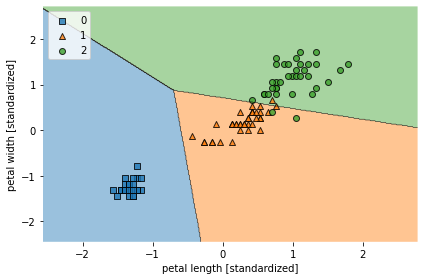

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear',multi_class='auto',
                        C=100.0,random_state=1)
lr.fit(X_train,y_train)

plot_decision_regions(X=X_train,
                      y=y_train,
                      clf=lr)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [0]:
lr.predict_proba(X_test[:3,:])

array([[8.98696972e-01, 1.01303028e-01, 4.88963539e-12],
       [8.98795245e-01, 1.01204755e-01, 3.04890823e-11],
       [1.77534063e-06, 2.36911186e-01, 7.63087038e-01]])

In [0]:
lr.predict_proba(X_test[:3,:]).argmax(axis=1)

array([0, 0, 2])

# 규제를 사용하여 과대적합 피하기
- 과대적합: 모델이 복잡하다는 뜻, 분산이 크다는 것
- 과소적합: 모델 단순, 편향이 크다는 것
- 이를 해결하기 위해 선형 결정 경계와 비선형 결정 경계를 비교해서 설명하는 것이 좋음.
- 규제는 과도한 파라미터(가중치)값을 제한하기 위해 추가적인 정보(편향)을 주입하는 개념이다.
- 가장 널리 사용하는 규제 형태는 L2규제

**규제는 공선성(특성 간의 높은 상관관계)을 다루거나 데이터에서 잡음을 제거하여 과대적합을 방지할 수 있는 매우 유용한 방법**
- 규제가 잘 동작하려면 모든 특성이 비슷한 스케일을 가져야 한다.

---

사이킷런에서 C는 감마의 역수를 뜻함. (감마값이 커질 수록 규제가 강화됨)

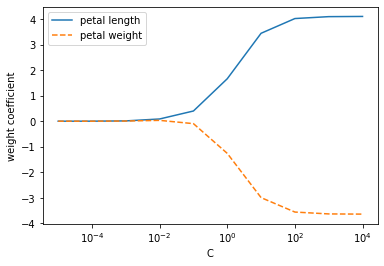

In [0]:
import numpy as np

weights, params =[], []
for c in np.arange(-5,5):
  lr = LogisticRegression(solver = 'liblinear',multi_class='auto',
                        C=10.**c,random_state=1)
  lr.fit(X_train,y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)

weights = np.array(weights)
plt.plot(params,weights[:,0],
         label = 'petal length')
plt.plot(params,weights[:,1],linestyle='--',
         label='petal weight')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

C값이 작아질 수록 가중치의 절대값이 줄어드는 것을 확인할 수 있음. 즉, 규제 강도가 증가함.